In [2]:
import torch
from torch import nn
from pathlib import Path

print(torch.__version__)

2.7.0+cpu


In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [4]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  print(f"Walking through '{dir_path}'...")
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"\nFound directory: {dirpath}")
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
data_dir = Path('./dataset/phase_1')  # Use the existing value of data_dir
train_dir = data_dir / "train"  # Use the existing value of train_dir
test_dir = data_dir / "test"  # Use the existing value of test_dir
train_dir, test_dir


(WindowsPath('dataset/phase_1/train'), WindowsPath('dataset/phase_1/test'))

In [6]:
walk_through_dir(data_dir)


Walking through 'dataset\phase_1'...

Found directory: dataset\phase_1
There are 2 directories and 0 images in 'dataset\phase_1'.

Found directory: dataset\phase_1\test
There are 0 directories and 28 images in 'dataset\phase_1\test'.

Found directory: dataset\phase_1\train
There are 29 directories and 0 images in 'dataset\phase_1\train'.

Found directory: dataset\phase_1\train\A
There are 0 directories and 3000 images in 'dataset\phase_1\train\A'.

Found directory: dataset\phase_1\train\B
There are 0 directories and 3000 images in 'dataset\phase_1\train\B'.

Found directory: dataset\phase_1\train\C
There are 0 directories and 3000 images in 'dataset\phase_1\train\C'.

Found directory: dataset\phase_1\train\D
There are 0 directories and 3000 images in 'dataset\phase_1\train\D'.

Found directory: dataset\phase_1\train\del
There are 0 directories and 3000 images in 'dataset\phase_1\train\del'.

Found directory: dataset\phase_1\train\E
There are 0 directories and 3000 images in 'dataset\ph

Random image path: dataset\phase_1\train\S\S1895.jpg
Image class: S
Image height: 200
Image width: 200


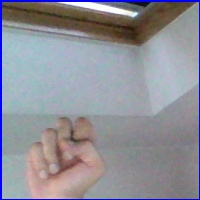

In [7]:
import random
from PIL import Image

img_path_list = list(data_dir.glob("*/*.jpg")) + list(data_dir.glob("*/*/*.jpg"))
random_img_path = random.choice(img_path_list)

image_class = random_img_path.parent.stem

img = Image.open(random_img_path)

print(f"Random image path: {random_img_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(199.5), np.float64(199.5), np.float64(-0.5))

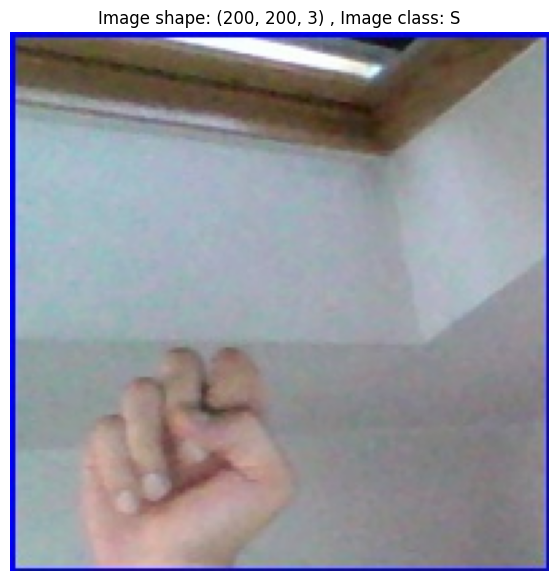

In [8]:
import numpy as np
import matplotlib.pyplot as plt

img_as_array = np.array(img)

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image shape: {img_as_array.shape} , Image class: {image_class}")
plt.axis(False)

Transforming data

In [9]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor(),
])

data_transform(img)

tensor([[[0.0627, 0.1529, 0.1647,  ..., 0.1490, 0.1922, 0.1843],
         [0.1294, 0.3216, 0.3608,  ..., 0.4235, 0.5373, 0.4314],
         [0.1412, 0.3216, 0.3059,  ..., 0.5647, 0.5529, 0.4196],
         ...,
         [0.2667, 0.6275, 0.6235,  ..., 0.4784, 0.4941, 0.3843],
         [0.2627, 0.6196, 0.6235,  ..., 0.4784, 0.4824, 0.3725],
         [0.2078, 0.4784, 0.4784,  ..., 0.3804, 0.3843, 0.2902]],

        [[0.0627, 0.1529, 0.1569,  ..., 0.1333, 0.1804, 0.1804],
         [0.1176, 0.2941, 0.3176,  ..., 0.3961, 0.5412, 0.4431],
         [0.1176, 0.2588, 0.2588,  ..., 0.5608, 0.5843, 0.4471],
         ...,
         [0.2941, 0.7059, 0.7098,  ..., 0.4941, 0.5137, 0.3961],
         [0.3020, 0.7098, 0.7098,  ..., 0.4902, 0.5059, 0.3922],
         [0.2235, 0.5373, 0.5373,  ..., 0.3647, 0.3725, 0.2863]],

        [[0.8471, 0.6784, 0.6510,  ..., 0.6588, 0.7098, 0.8314],
         [0.6549, 0.2902, 0.2627,  ..., 0.3804, 0.5412, 0.6784],
         [0.6314, 0.2275, 0.1843,  ..., 0.5373, 0.5765, 0.

2.2.5


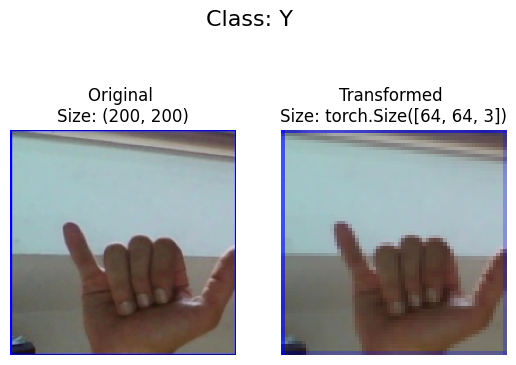

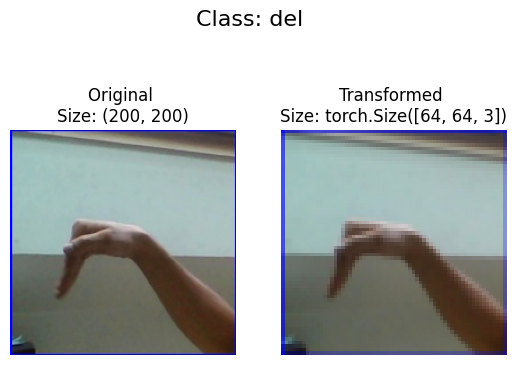

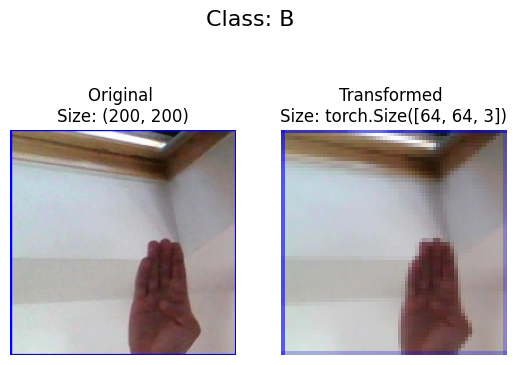

In [10]:
print(np.__version__)

def plot_transformed_images(image_paths, transform, n=3, seed=42):
    """Plots a series of random images from image_paths.

    Will open n image paths from image_paths, transform them
    with transform and plot them side by side.

    Args:
        image_paths (list): List of target image paths. 
        transform (PyTorch Transforms): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (int, optional): Random seed for the random generator. Defaults to 42.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(img_path_list, 
                        transform=data_transform, 
                        n=3)

In [11]:
from torchvision import datasets

print(f"Train directory: {train_dir} \n")
print(f"Test directory: {test_dir} \n")
test_data = []
train_data = datasets.ImageFolder(root=train_dir, transform=data_transform, target_transform=None)

for img_path in test_dir.glob("*.jpg"):  # Adjust extension if needed
    img = Image.open(img_path).convert("RGB")
    img = data_transform(img)
    test_data.append((img, train_data.classes.index(img_path.stem.split("_")[0])))  

# img, label = train_data[0]  # Get the first image and label from the dataset
# print(f"traindata img: {img} \n")
# print(f"traindata label: {label} \n")
# img, label = test_data[0]  # Get the first image and label from the dataset
# print(f"testdata img: {img} \n")
# print(f"testdata label: {label} \n")


Train directory: dataset\phase_1\train 

Test directory: dataset\phase_1\test 



In [12]:
class_names = train_data.classes
print(f"Class names: {class_names} \n")


ing, label = train_data[0]  # Get the first image and its label
print(f"Image shape: {img.shape} \n")
print(f"Label: {label} \n")
print(f"image datatype: {img.dtype} \n")
print(f"Label datatype: {type(label)} \n")

Class names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'del', 'nothing', 'space'] 

Image shape: torch.Size([3, 64, 64]) 

Label: 0 

image datatype: torch.float32 

Label datatype: <class 'int'> 



In [13]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

for batch, (X, y) in enumerate(train_dataloader):
    print(f"Batch: {batch} \n")
    print(f" X type: {type(X)} \n")
    print(f" y type: {type(y)} \n")
    print(f"X shape: {X.shape} \n")
    print(f"y shape: {y.shape} \n")
    print(f"X datatype: {X.dtype} \n")
    print(f"y datatype: {y.dtype} \n")
    break  # Just to see the first batch, remove this in practi
for batch, (X, y) in enumerate(test_dataloader):
    print(f"Batch: {batch} \n")
    print(f" X type: {type(X)} \n")
    print(f" y type: {type(y)} \n")
    print(f"X shape: {X.shape} \n")
    print(f"y shape: {y.shape} \n")
    print(f"X datatype: {X.dtype} \n")
    print(f"y datatype: {y.dtype} \n")
    break  # Just to see the first batch, remove this in practi

Batch: 0 

 X type: <class 'torch.Tensor'> 

 y type: <class 'torch.Tensor'> 

X shape: torch.Size([32, 3, 64, 64]) 

y shape: torch.Size([32]) 

X datatype: torch.float32 

y datatype: torch.int64 

Batch: 0 

 X type: <class 'torch.Tensor'> 

 y type: <class 'torch.Tensor'> 

X shape: torch.Size([28, 3, 64, 64]) 

y shape: torch.Size([28]) 

X datatype: torch.float32 

y datatype: torch.int64 



In [14]:
img, label = next(iter(train_dataloader))
print(f"Image shape: {img.shape} \n")
print(f"Label shape: {label.shape} \n")
img, label = next(iter(test_dataloader))
print(f"Image shape: {img.shape} \n")
print(f"Label shape: {label.shape} \n")

Image shape: torch.Size([32, 3, 64, 64]) 

Label shape: torch.Size([32]) 

Image shape: torch.Size([28, 3, 64, 64]) 

Label shape: torch.Size([28]) 



In [15]:
from typing import List
# 1. Take in a Dataset as well as a list of class names
def display_random_images(dataset: torch.utils.data.dataset.Dataset,
                          classes: List[str] = None,
                          n: int = 10,
                          display_shape: bool = True,
                          seed: int = None):
    
    # 2. Adjust display if n too high
    if n > 10:
        n = 10
        display_shape = False
        print(f"For display purposes, n shouldn't be larger than 10, setting to 10 and removing shape display.")
    
    # 3. Set random seed
    if seed:
        random.seed(seed)

    # 4. Get random sample indexes
    random_samples_idx = random.sample(range(len(dataset)), k=n)

    # 5. Setup plot
    plt.figure(figsize=(20, 8))

    # 6. Loop through samples and display random samples 
    for i, targ_sample in enumerate(random_samples_idx):
        targ_image, targ_label = dataset[targ_sample][0], dataset[targ_sample][1]

        # 7. Adjust image tensor shape for plotting: [color_channels, height, width] -> [color_channels, height, width]
        targ_image_adjust = targ_image.permute(1, 2, 0)

        # Plot adjusted samples
        plt.subplot(1, n, i+1)
        plt.imshow(targ_image_adjust)
        plt.axis("off")
        if classes:
            title = f"class: {classes[targ_label]}"
            if display_shape:
                title = title + f"\nshape: {targ_image_adjust.shape}"
        plt.title(title)

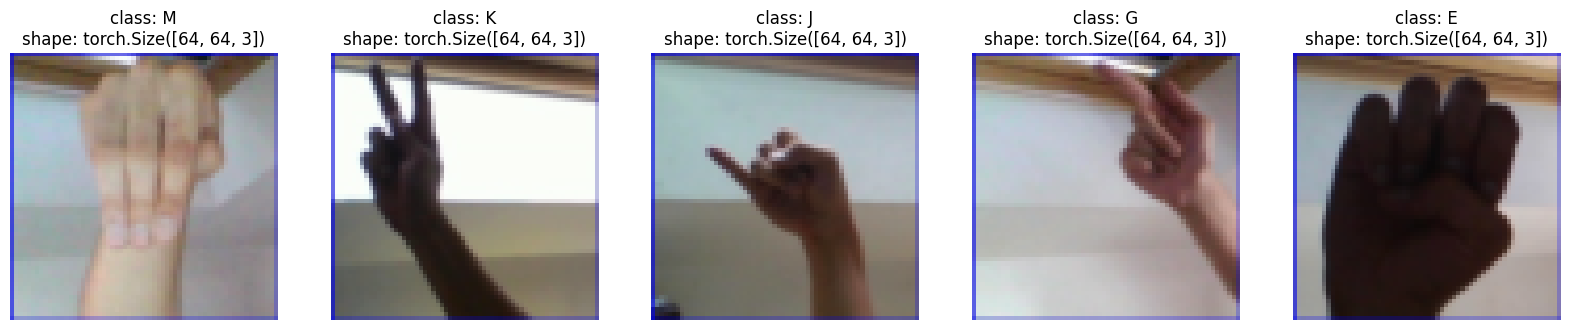

In [16]:
# Display random images from ImageFolder created Dataset
display_random_images(train_dataloader.dataset, 
                      n=5, 
                      classes=class_names,
                      seed=None)

Creating the model

In [17]:
class TinyVGG(nn.Module):
    
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.fc_layer = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*8*8, out_features=output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(f"Shape after conv_block_1: {x.shape}")
        x = self.conv_block_2(x)
        # print(f"Shape after conv_block_2: {x.shape}")
        x = self.conv_block_3(x)
        # print(f"Shape after conv_block_3: {x.shape}")
        x = self.fc_layer(x)
        # print(f"Shape after fc_layer: {x.shape}")
        return x
    def __str__(self):
        return f"TinyVGG(\n  conv_block_1={self.conv_block_1},\n  conv_block_2={self.conv_block_2},\n  conv_block_3={self.conv_block_3},\n  fc_layer={self.fc_layer}\n)"

In [18]:
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=len(class_names)).to(device)
model_0(img[0].unsqueeze(0).to(device))  # Add batch dimension and send to device

tensor([[ 3.5958e-02, -2.6222e-02, -8.0580e-02, -1.9437e-02, -2.2830e-02,
         -1.3999e-01,  3.9570e-02,  6.0468e-02, -4.7556e-02,  7.0456e-02,
          2.9303e-02, -4.4804e-02, -1.7153e-02, -8.0967e-03,  6.4071e-02,
          6.3773e-03, -2.9109e-02, -7.2515e-02, -9.0652e-02,  2.8764e-02,
          2.1027e-02, -5.3772e-03,  5.0904e-02, -5.6531e-02,  4.3865e-05,
          2.6109e-02,  3.4981e-03,  5.3791e-03,  4.4123e-02]],
       grad_fn=<AddmmBackward0>)

In [19]:
model_0.eval()
with torch.inference_mode():
    random_image = img[0].unsqueeze(0).to(device)  # Add batch dimension and move to device
    pred = model_0(random_image)
    print(f"output logists: {pred}")
    print(f"actual label: {image_class}")
    print(f"output prediction label: {class_names[pred.argmax(dim=1).squeeze()]}")
    print(f"output length: {len(pred.squeeze(dim=1)[0])}")

output logists: tensor([[ 3.5958e-02, -2.6222e-02, -8.0580e-02, -1.9437e-02, -2.2830e-02,
         -1.3999e-01,  3.9570e-02,  6.0468e-02, -4.7556e-02,  7.0456e-02,
          2.9303e-02, -4.4804e-02, -1.7153e-02, -8.0967e-03,  6.4071e-02,
          6.3773e-03, -2.9109e-02, -7.2515e-02, -9.0652e-02,  2.8764e-02,
          2.1027e-02, -5.3772e-03,  5.0904e-02, -5.6531e-02,  4.3865e-05,
          2.6109e-02,  3.4981e-03,  5.3791e-03,  4.4123e-02]])
actual label: S
output prediction label: J
output length: 29


In [20]:
try:
    import torchinfo
except ImportError:
    !pip install torchinfo
    import torchinfo

from torchinfo import summary
summary(model_0, 
    input_size=(32, 3, 64, 64), 
    col_names=["input_size", "output_size", "num_params", "trainable"], 
    row_settings=["var_names"],
        depth=2)  # Set depth to 2 to show the full model structure

Layer (type (var_name))                  Input Shape               Output Shape              Param #                   Trainable
TinyVGG (TinyVGG)                        [32, 3, 64, 64]           [32, 29]                  --                        True
├─Sequential (conv_block_1)              [32, 3, 64, 64]           [32, 10, 32, 32]          --                        True
│    └─Conv2d (0)                        [32, 3, 64, 64]           [32, 10, 64, 64]          280                       True
│    └─ReLU (1)                          [32, 10, 64, 64]          [32, 10, 64, 64]          --                        --
│    └─Conv2d (2)                        [32, 10, 64, 64]          [32, 10, 64, 64]          910                       True
│    └─ReLU (3)                          [32, 10, 64, 64]          [32, 10, 64, 64]          --                        --
│    └─MaxPool2d (4)                     [32, 10, 64, 64]          [32, 10, 32, 32]          --                        --
├─Sequent

Creating train and test loop

In [21]:
def train_step(model: nn.Module, 
             dataloader: DataLoader, 
             loss_fn: nn.Module, 
             optimizer: torch.optim.Optimizer, 
             device: str = device):
    # put model in training mode
    model.train()
    
    # setup loss and accuracy values
    train_loss, train_acc = 0, 0

    # loop through data loader data batches
    for batch, (X, Y) in enumerate(dataloader):
        # send data to target device
        # print(f"type of X: {type(X)}")
        # print(f"type of Y: {type(Y)}")
        # 1. Forward pass
        y_pred = model(X)
        
        # 2. Calculate loss and accuracy
        loss = loss_fn(y_pred, Y)
        acc = (y_pred.argmax(dim=1) == Y).float().mean()
        
        # 3. Backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        # 4. Optimizer step
        optimizer.step()

        # 5. Accumulate loss and accuracy values
        train_loss += loss.item()
        train_acc += acc.item()
    
    # 6. Calculate average loss and accuracy
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [22]:
def test_step(model: nn.Module,
                dataloader: DataLoader, 
                loss_fn: nn.Module, 
                device: str = device):
        # put model in evaluation mode
        model.eval()
        
        # setup loss and accuracy values
        test_loss, test_acc = 0, 0

        with torch.inference_mode():
            # 1. Loop through data loader data batches
            for batch, (X, Y) in enumerate(dataloader):
                # send data to target device
                print(f"type of X: {type(X)}")
                print(f"type of Y: {type(Y)}")
                # 2. Forward pass
                y_pred = model(X)
                
                # 3. Calculate loss and accuracy
                loss = loss_fn(y_pred, Y)
                acc = (y_pred.argmax(dim=1) == Y).float().mean()
                
                # 4. Accumulate loss and accuracy values
                test_loss += loss.item()
                test_acc += acc.item()    
        test_loss = test_loss / len(dataloader)
        test_acc = test_acc / len(dataloader)
        return loss, acc

In [23]:
from tqdm import tqdm

def train(model: nn.Module,
          train_dataloader: DataLoader, 
          test_dataloader: DataLoader, 
          optimizer: torch.optim.Optimizer, 
          loss_fn: nn.Module, 
          epochs: int = 5, 
          device: str = device):
    # setup training and testing loss and accuracy lists
    train_loss_list, test_loss_list = [], []
    train_acc_list, test_acc_list = [], []

    # loop through epochs
    for epoch in tqdm(range(epochs)):
        print(f"Epoch {epoch+1}/{epochs}")

        # 1. Train model on training data
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer,
                                           device=device)
        
        # 2. Test model on testing data
        test_loss, test_acc = test_step(model=model,
                                        dataloader=test_dataloader,
                                        loss_fn=loss_fn,
                                        device=device)

        # 3. Append results to lists
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

    return {
        "train_loss": train_loss_list,
        "test_loss": test_loss_list,
        "train_acc": train_acc_list,
        "test_acc": test_acc_list
    }

In [24]:
torch.manual_seed(42)

NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optmizer = torch.optim.Adam(params=model_0.parameters(), lr=0.001)


from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optmizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS,
                        device=device)
end_time = timer()
total_time = end_time - start_time
print(f"Training time: {total_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1/5


 20%|██        | 1/5 [18:02<1:12:09, 1082.50s/it]

type of X: <class 'torch.Tensor'>
type of Y: <class 'torch.Tensor'>
Epoch 2/5


 40%|████      | 2/5 [25:02<34:37, 692.59s/it]   

type of X: <class 'torch.Tensor'>
type of Y: <class 'torch.Tensor'>
Epoch 3/5


 60%|██████    | 3/5 [28:36<15:47, 473.99s/it]

type of X: <class 'torch.Tensor'>
type of Y: <class 'torch.Tensor'>
Epoch 4/5


 80%|████████  | 4/5 [32:13<06:12, 372.64s/it]

type of X: <class 'torch.Tensor'>
type of Y: <class 'torch.Tensor'>
Epoch 5/5


100%|██████████| 5/5 [35:52<00:00, 430.56s/it]

type of X: <class 'torch.Tensor'>
type of Y: <class 'torch.Tensor'>
Training time: 2152.825 seconds


In [25]:
model_0_results

{'train_loss': [1.2532839449715114,
  0.28966569124421965,
  0.19209913046035193,
  0.1466817133662638,
  0.12301962195094791],
 'test_loss': [tensor(0.0994),
  tensor(0.0799),
  tensor(0.1817),
  tensor(0.0018),
  tensor(0.0004)],
 'train_acc': [0.6178780495353199,
  0.9021277736986153,
  0.9344159923918591,
  0.9493763025695237,
  0.9577165318131666],
 'test_acc': [tensor(0.9643),
  tensor(0.9643),
  tensor(0.9643),
  tensor(1.),
  tensor(1.)]}

In [26]:
PATH = Path("models")
if not PATH.exists():
    PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "model_0.pth"
MODEL_SAVE_PATH = PATH / MODEL_NAME
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)
print(f"Model saved to: {MODEL_SAVE_PATH}")

Model saved to: models\model_0.pth


In [27]:
model_0.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-1.9642e-01,  1.4563e-01,  7.8237e-04],
                        [-1.3116e-02, -9.6744e-02,  2.7896e-03],
                        [-7.2874e-02,  4.7378e-02, -1.0999e-01]],
              
                       [[ 3.2703e-02,  1.7760e-01,  1.5565e-01],
                        [ 1.0298e-01, -1.4826e-01, -6.4429e-02],
                        [-1.1070e-01, -4.3777e-02, -1.8638e-01]],
              
                       [[-1.7774e-01, -1.8075e-01,  3.2177e-02],
                        [-8.3353e-02,  2.6440e-02, -5.3702e-02],
                        [-2.9193e-02, -1.5985e-01, -1.3518e-01]]],
              
              
                      [[[-2.6295e-01, -1.3313e-01, -2.7261e-02],
                        [ 3.8450e-03, -3.3930e-02, -2.1093e-01],
                        [-4.8624e-02, -1.2966e-01, -9.1633e-02]],
              
                       [[ 6.6751e-02,  1.3546e-01,  2.9458e-01],
                        [ 2.5750e-01